# Assignment 1 Case Study: Predicting Car Prices

**Disclamer:** "./chaklam-silpasuwanchai/Python-for-Machine-Learning-Main/00 - Case Study/data/01 - Case study - Regression.py" is being used as a template. 

# Task 1. Preparing the datasets

# Importing Libraries

In [1]:
#libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

#dependencies should be installed as per dockerfile, particularly python v3.11.4-bookworm
#checking
import sys
print(sys.version)
print(sys.version_info)

print(np.__version__)
print(pd.__version__)
print(sns.__version__) 


3.13.2 (tags/v3.13.2:4f8bb39, Feb  4 2025, 15:23:48) [MSC v.1942 64 bit (AMD64)]
sys.version_info(major=3, minor=13, micro=2, releaselevel='final', serial=0)
2.2.6
2.3.2
0.13.2


# Load Data

In [2]:
df = pd.read_csv('./dataset/Cars.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
# Check the shape of your data
print("Data Shape:", df.shape)
df.describe()

Data Shape: (8128, 13)


,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [4]:
#checking data types of the Cars.csv
print(df.columns)
print(df.info())
#here we can see that we have total 8128 rows including the 0th row for columnar names
#since we can see that some columns have non-null as less than 8128 rows, nan data exists in our dataset

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
me

Dropping all rows with CNG and LPGs as instructed in pdf

In [5]:
print("Before dropping: ", df.fuel.unique())
df = df[df["fuel"].str.contains("LPG")==False]
df = df[df["fuel"].str.contains("CNG")==False]
print("After dropping: ", df.fuel.unique())
#successfully dropped

Before dropping:  ['Diesel' 'Petrol' 'LPG' 'CNG']
After dropping:  ['Diesel' 'Petrol']


For mileage removing "kmpl" from the string and converting the datatype into numerical as instructed in pdf

In [6]:
df['mileage'] = df['mileage'].str.replace('kmpl','')
df['mileage'] = df['mileage'].astype(float)
print("After dropping kmpl: ", df['mileage'].info())
#as we can see, it is now float64


<class 'pandas.core.series.Series'>
Index: 8033 entries, 0 to 8127
Series name: mileage
Non-Null Count  Dtype  
--------------  -----  
7819 non-null   float64
dtypes: float64(1)
memory usage: 125.5 KB
After dropping kmpl:  None


Doing the same for feature 'engine' and 'max power' by removing "CC" and "bhp" respectively and coverting them into a numerical datatype


In [7]:
df['engine'] = df['engine'].str.replace('CC','')
df['engine'] = df['engine'].astype(float)
df['max_power'] = df['max_power'].str.replace('bhp','')
df['max_power'] = df['max_power'].astype(float)
print("After dropping CC and bhp: \n")
print("Engine:")
print(df['engine'].info())
print("\nMax Power:")
print(df['max_power'].info())
#both of them are float now as well

After dropping CC and bhp: 

Engine:
<class 'pandas.core.series.Series'>
Index: 8033 entries, 0 to 8127
Series name: engine
Non-Null Count  Dtype  
--------------  -----  
7819 non-null   float64
dtypes: float64(1)
memory usage: 125.5 KB
None

Max Power:
<class 'pandas.core.series.Series'>
Index: 8033 entries, 0 to 8127
Series name: max_power
Non-Null Count  Dtype  
--------------  -----  
7825 non-null   float64
dtypes: float64(1)
memory usage: 125.5 KB
None


Taking only the first name of the label 'brand' and dropping the rest of it

In [8]:
print("Before dropping brand model names after space:\n",df['name'])
df['name'] = df['name'].str.split().str[0]
print("\nAfter dropping brand model names after space:\n", df['name'])

Before dropping brand model names after space:
 0             Maruti Swift Dzire VDI
1       Skoda Rapid 1.5 TDI Ambition
2           Honda City 2017-2020 EXi
3          Hyundai i20 Sportz Diesel
4             Maruti Swift VXI BSIII
                    ...             
8123               Hyundai i20 Magna
8124           Hyundai Verna CRDi SX
8125          Maruti Swift Dzire ZDi
8126                 Tata Indigo CR4
8127                 Tata Indigo CR4
Name: name, Length: 8033, dtype: object

After dropping brand model names after space:
 0        Maruti
1         Skoda
2         Honda
3       Hyundai
4        Maruti
         ...   
8123    Hyundai
8124    Hyundai
8125     Maruti
8126       Tata
8127       Tata
Name: name, Length: 8033, dtype: object


Dropping feature 'torque' and rows where the label 'owner' has the value 'test drive' as instructed in pdf

In [9]:
df.drop(columns = ['torque'], inplace=True)
df = df[df["owner"].str.contains("Test Drive Car")==False]
print("After dropping torque and 'Test Drive Car':")
print(df.info())
print()
print("Car Owner:", df.owner.unique())
#as you can see below, Test Drive Car no longer exists

After dropping torque and 'Test Drive Car':
<class 'pandas.core.frame.DataFrame'>
Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8028 non-null   object 
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   int64  
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   object 
 5   seller_type    8028 non-null   object 
 6   transmission   8028 non-null   object 
 7   owner          8028 non-null   object 
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 815.3+ KB
None

Car Owner: ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner']


# 2. Exploratory Data Analysis (EDA)
Label Encoding

In [10]:
#label encoding is useful to do before EDA because categorical data is turned into numbers which makes them plot-able on a chart 
#as they're now "numerical"

#taking a look at the columns' data type
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object

In [11]:
#also taking a look at all the possible values of the categorical datatype columns including "nan"print(df.gender.unique())
print("Name:", df.name.unique())
print("Fuel:", df.fuel.unique())
print("Seller Type:", df.seller_type.unique())
print("Transmission:", df.transmission.unique())
print("Owner:", df.owner.unique())

Name: ['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Fiat' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Audi' 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo'
 'Daewoo' 'Kia' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel' 'Peugeot']
Fuel: ['Diesel' 'Petrol']
Seller Type: ['Individual' 'Dealer' 'Trustmark Dealer']
Transmission: ['Manual' 'Automatic']
Owner: ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner']


In [12]:
#doing label encoding on categoricals with just two values; Fuel and Transmission
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['fuel'] = le.fit_transform(df['fuel'])
print("I want to know the mapping of 0 and 1 in Fuel:", le.inverse_transform([0, 1]))
df['transmission'] = le.fit_transform(df['transmission'])
print("I want to know the mapping of 0 and 1 in Transmission:", le.inverse_transform([0, 1]))
#encoding completed 

I want to know the mapping of 0 and 1 in Fuel: ['Diesel' 'Petrol']
I want to know the mapping of 0 and 1 in Transmission: ['Automatic' 'Manual']


In [13]:
#doing label encoding on labels with more categories; name, seller type, owner

df['name'] = le.fit_transform(df['name'])
print("I want to know the mapping of 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30 and 31 in name:\n", le.inverse_transform([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]))
df['seller_type'] = le.fit_transform(df['seller_type'])
print("I want to know the mapping of 0, 1 and 2 in Seller Type:", le.inverse_transform([0, 1, 2]))
df['owner'] = le.fit_transform(df['owner'])
print("I want to know the mapping of 0, 1, 2 and 3 in Seller Type:", le.inverse_transform([0, 1, 2, 3]))
#encoding completed 

I want to know the mapping of 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30 and 31 in name:
 ['Ambassador' 'Ashok' 'Audi' 'BMW' 'Chevrolet' 'Daewoo' 'Datsun' 'Fiat'
 'Force' 'Ford' 'Honda' 'Hyundai' 'Isuzu' 'Jaguar' 'Jeep' 'Kia' 'Land'
 'Lexus' 'MG' 'Mahindra' 'Maruti' 'Mercedes-Benz' 'Mitsubishi' 'Nissan'
 'Opel' 'Peugeot' 'Renault' 'Skoda' 'Tata' 'Toyota' 'Volkswagen' 'Volvo']
I want to know the mapping of 0, 1 and 2 in Seller Type: ['Dealer' 'Individual' 'Trustmark Dealer']
I want to know the mapping of 0, 1, 2 and 3 in Seller Type: ['First Owner' 'Fourth & Above Owner' 'Second Owner' 'Third Owner']


Fixing nan values

In [14]:
df.info()
#anything else than 8028 contains nan
#thus mileage, engine, max_power and seats contain nan values

<class 'pandas.core.frame.DataFrame'>
Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8028 non-null   int64  
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   int64  
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   int64  
 5   seller_type    8028 non-null   int64  
 6   transmission   8028 non-null   int64  
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 815.3 KB


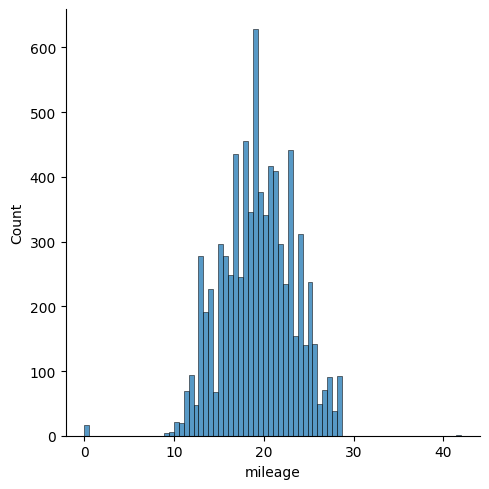

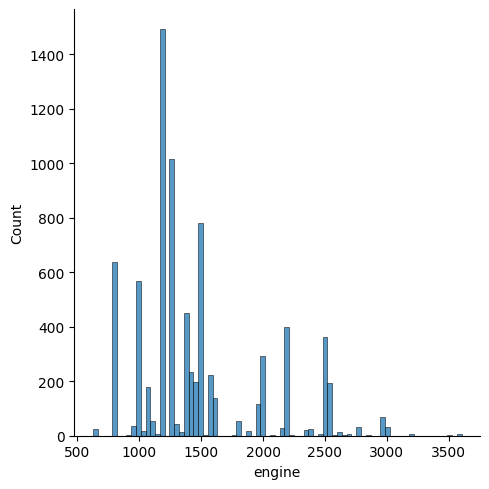

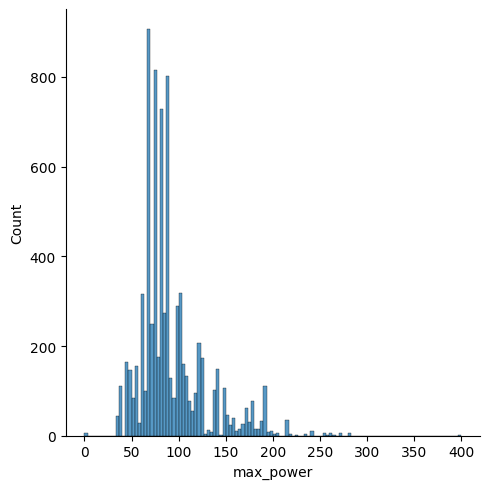

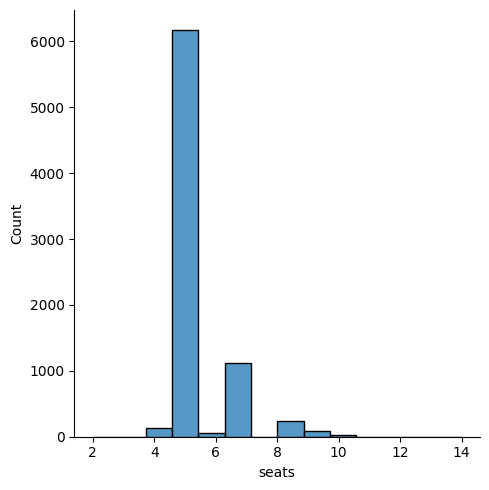

In [15]:
#checking their distribution
sns.displot(data = df, x = 'mileage') #looks normal distribution
sns.displot(data = df, x = 'engine') #looks random?
sns.displot(data = df, x = 'max_power') #skewed to left
sns.displot(data = df, x = 'seats') #skewed to left

In [16]:
#filling in the missing values
df['mileage'].fillna(df['mileage'].mean(), inplace=True)  #normal dist
df['max_power'].fillna(df['max_power'].median(), inplace=True)  #skewed
df['engine'].fillna(df['engine'].median(), inplace=True)  #skewed
df['seats'].fillna(df['seats'].median(), inplace=True)  #skewed
#we will not touch selling_price because it is the target value

#verifying that there are no more nan values
print("Testing for nan:")
df.isna().sum()

Testing for nan:


name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

Univariate Analysis

<Axes: xlabel='fuel', ylabel='count'>

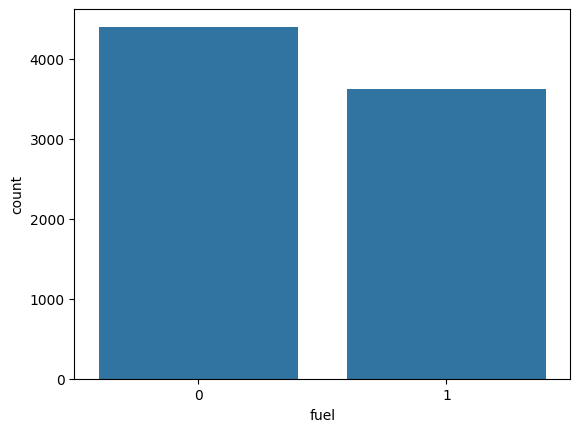

In [17]:
#checking the distribution of diesel and petrol cars
sns.countplot(data = df, x = 'fuel')

Displot

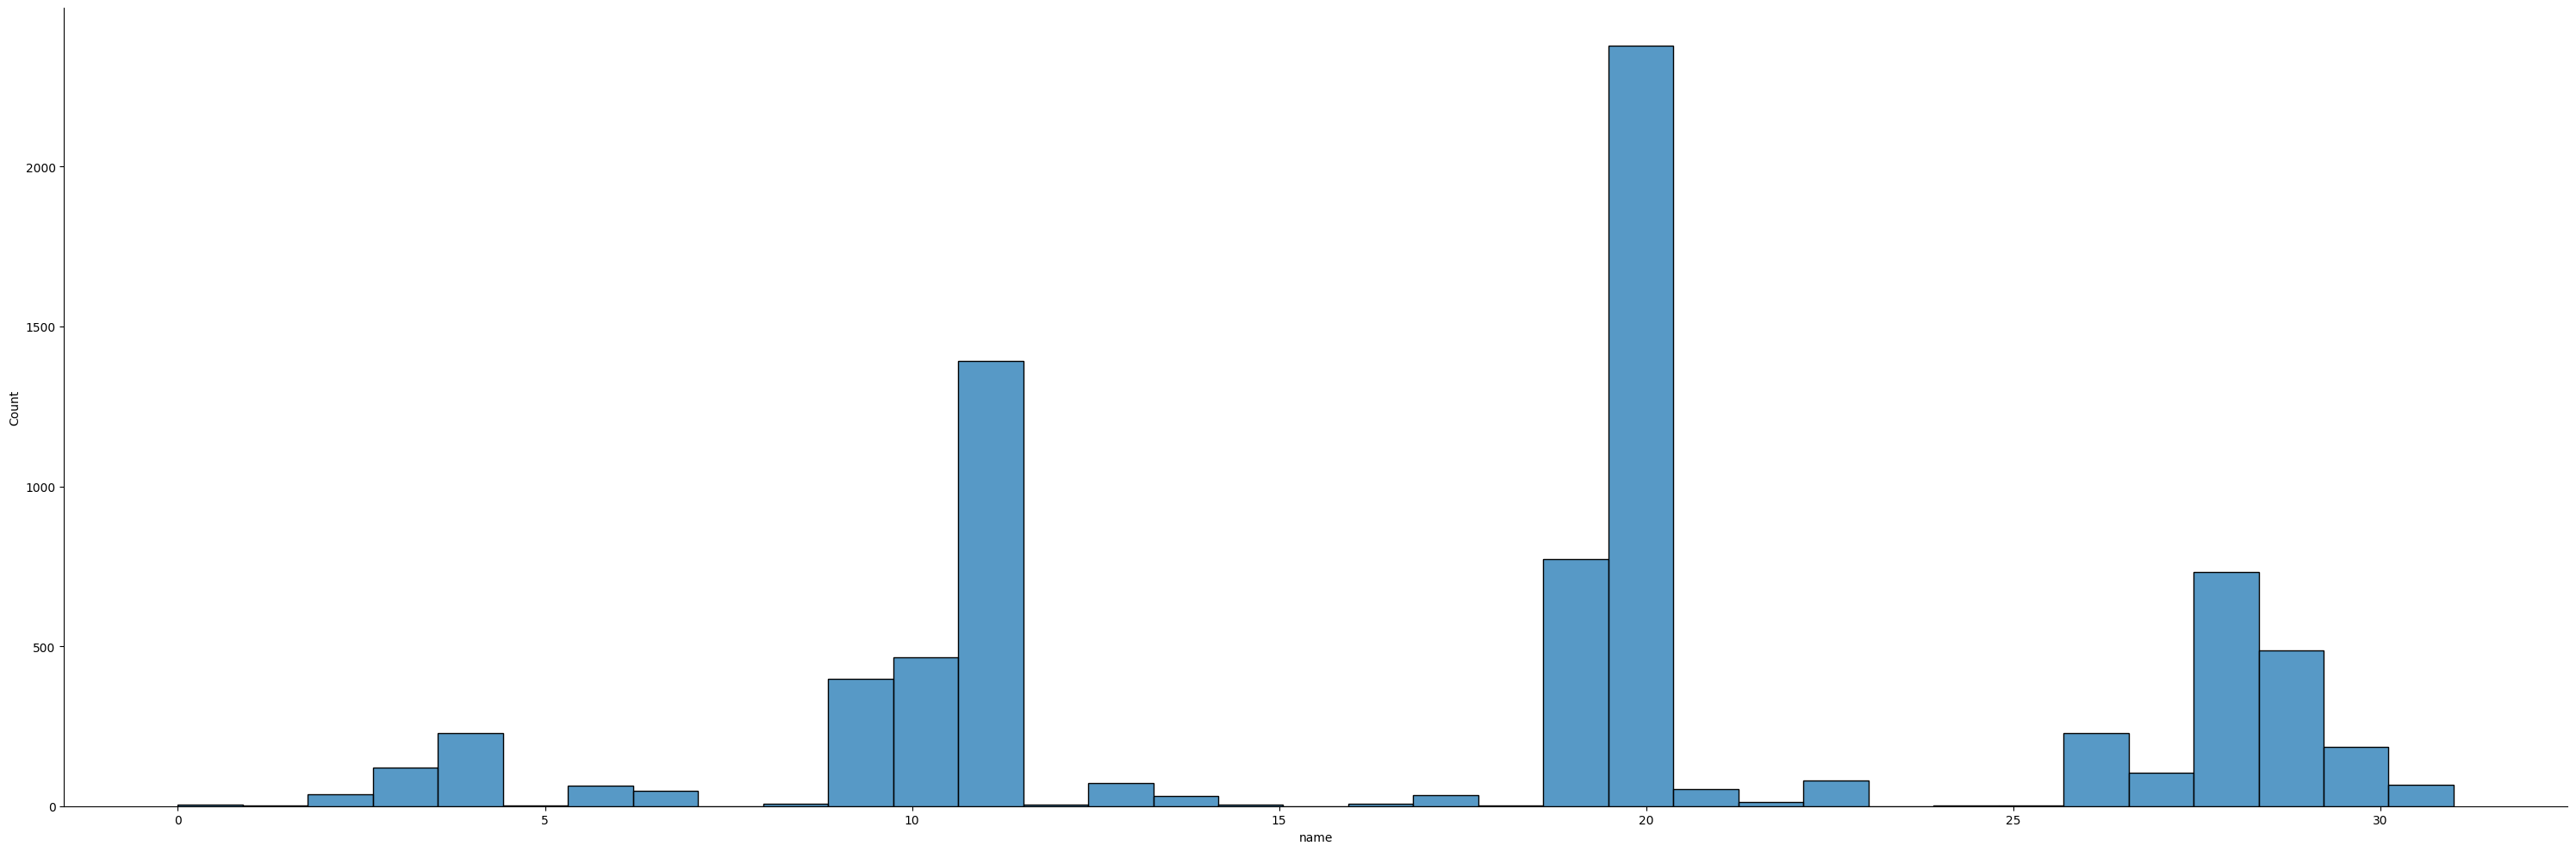

In [18]:
#counting the total number of cars distributed by brand
sns.displot(data = df, x = 'name', height=10, aspect=3)

Multivariate
Scatterplot

<Axes: xlabel='km_driven', ylabel='selling_price'>

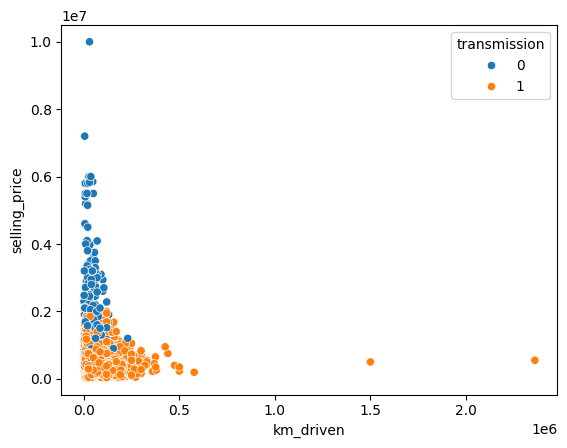

In [19]:
#taking a look at whether a certain transmission retains their proces better age
sns.scatterplot(x = df['km_driven'], y = df['selling_price'], hue=df['transmission'])


Box plot

Text(0.5, 0, 'Seller Type')

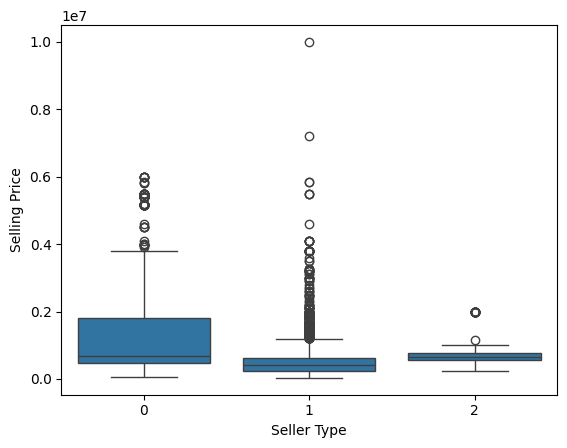

In [20]:
#checking price distribution between different types of sellers
sns.boxplot(y = df["selling_price"], x = df["seller_type"]);
plt.ylabel("Selling Price")
plt.xlabel("Seller Type")

# Correlation Matrix

<Axes: >

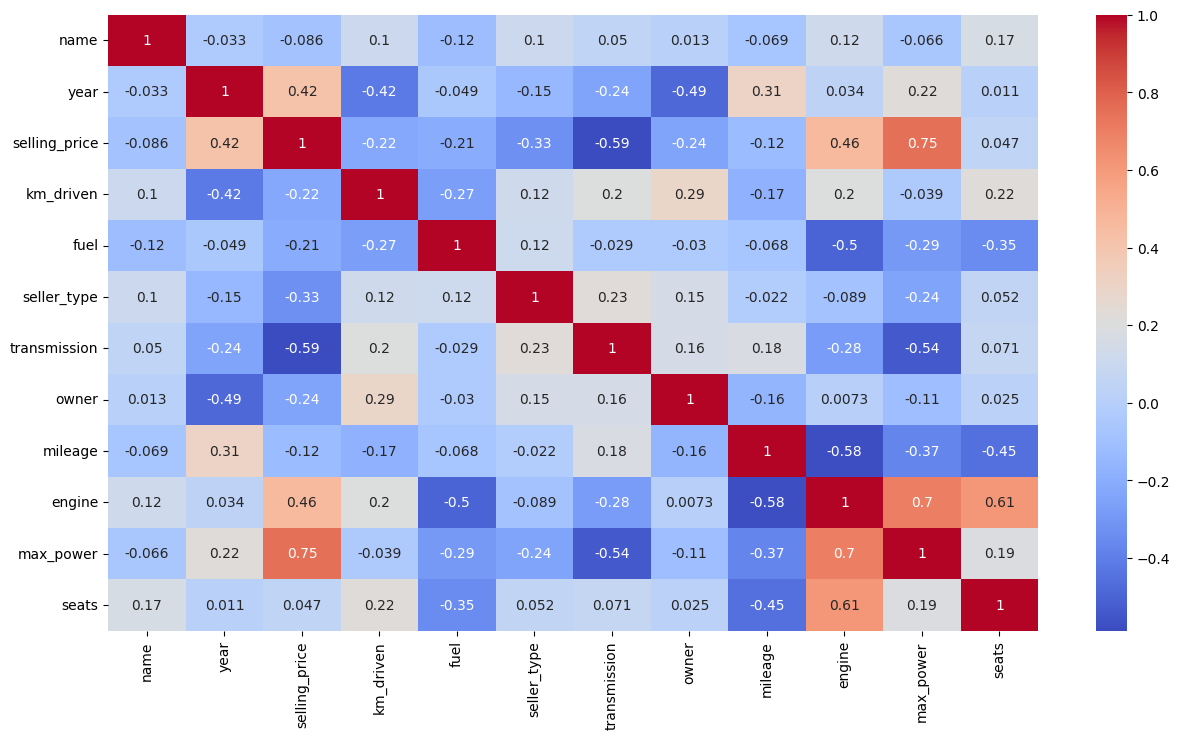

In [21]:
#Let's check out the correlation matrix
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")  

y is target which is the car price
X is our strong features

after analyzing correlation matrix, we can see that
currently our strongest features in descending order are:
max_power = 0.75, engine = 0.46, year = 0.42

in principle all of the three features make sense in terms of causation and will be selected

# 3. Feature Engineering - Skipped

# 4. Feature Selection

In [22]:
#selecting y aka the target, the value to be predicted
y = df["selling_price"]
y = np.log(df['selling_price'])  #scaling it via log to improve model training speed

#selecting X aka the labels, the variables which predict the values
X = df[['max_power', 'engine', 'year']]

In [23]:
#getting a view of our data before scaling to ensure scaling was applied propertly
y.head()

0    13.017003
1    12.821258
2    11.970350
3    12.323856
4    11.775290
Name: selling_price, dtype: float64

In [24]:
#splitting the model into 70% and 30% for training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# 5. Pre-Processing

In [25]:
#we've already done pre-processing earlier, there are no variables with nan
X_train.isna().sum()

max_power    0
engine       0
year         0
dtype: int64

# 6. Modelling

In [26]:
#First let's check shapes of all X_train, X_test, y_train, y_test to see if it was split correctly
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 3)
Shape of X_test:  (2409, 3)
Shape of y_train:  (5619,)
Shape of y_test:  (2409,)


here we are doing cross validation + grid  search

In [27]:
#importing all the regression models
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#our models and their names in the two lists respectively
algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0), 
              RandomForestRegressor(n_estimators = 100, random_state = 0)]

algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]

In [28]:
#we are using kfold to 
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

#lists for keeping mse
train_mse = []
test_mse = []

#kfold means we are splitting training data into different parts (5 in this case), 1 will be validation set and 4 will be train set per model
#the model will train on different iterations of the splits where the fold from 1 to 5 will be the validation set and everything else training set
kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Neg Mean: {scores.mean()}")
    
#since we are using NMSE, smaller number is better and thus the best model shown below is Random Forest Regression Model of = -0.0580 value (rounded)

Linear Regression - Score: [-0.11692514 -0.10707497 -0.1009613  -0.10941832 -0.1059004 ]; Neg Mean: -0.10805602465052769
SVR - Score: [-0.33138218 -0.31555697 -0.33794654 -0.3163912  -0.30980349]; Neg Mean: -0.322216076747882
KNeighbors Regressor - Score: [-0.07155298 -0.07115585 -0.06755289 -0.06817043 -0.06337993]; Neg Mean: -0.0683624172932638
Decision-Tree Regressor - Score: [-0.07295127 -0.06903164 -0.07384684 -0.0684042  -0.05602539]; Neg Mean: -0.06805186949297778
Random-Forest Regressor - Score: [-0.06908097 -0.055286   -0.05518902 -0.05175552 -0.0596706 ]; Neg Mean: -0.05819642362523765


# Grid Search

In [29]:
#now we are doing grid search to find the best iteration of k_fold distribution to get the model with the best NMSE score from
#amongst the random forest regression models

from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rf = RandomForestRegressor(random_state = 42)

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')

# Fit your grid_search
grid.fit(X_train, y_train);  #fit means start looping all the possible parameters

In [30]:
grid.best_params_
best_mse = grid.best_score_
print("The best NMSE that we can get with Random Forest is:", best_mse)
#here NMSE is 0.0577 which is better than 0.0578 from above (rounded)

The best NMSE that we can get with Random Forest is: -0.0585414509154751


# 7. Testing

In [31]:
yhat = grid.predict(X_test)
print("Thus, our model's NMSE score when applied on the test dataset is:", mean_squared_error(y_test, yhat))

Thus, our model's NMSE score when applied on the test dataset is: 0.05221991636434758


# 8. Analysis

In [32]:
#in ML some algorithms give better feature importance after the model is fitted which is in best_estimator_
rf = grid.best_estimator_

rf.feature_importances_

array([0.44262565, 0.09004371, 0.46733064])

<BarContainer object of 3 artists>

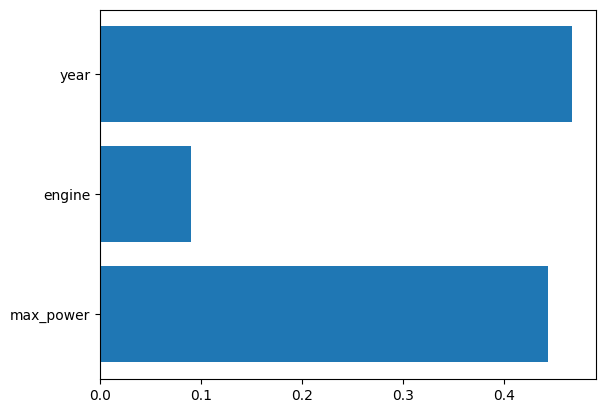

In [33]:
#plotting the weight in graph
plt.barh(X.columns, rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

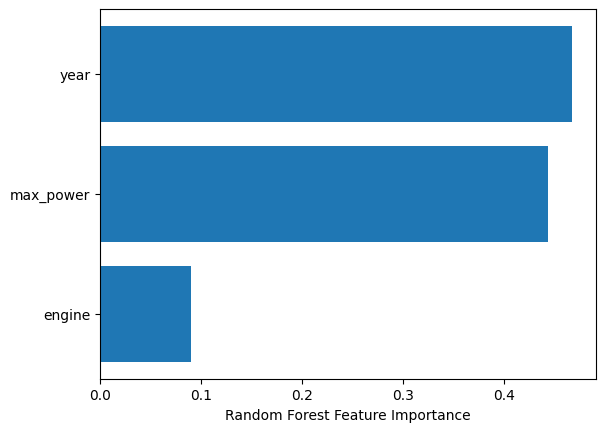

In [34]:
#sorting them for better view in ascending order of y-axis
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Finding out which features impact the model the most via permutation way

Text(0.5, 0, 'Random Forest Feature Importance')

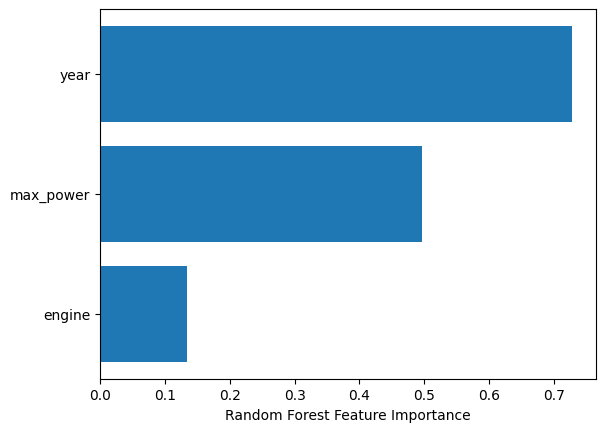

In [35]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rf, X_test, y_test)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Utilizing shap method this way around

In [36]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

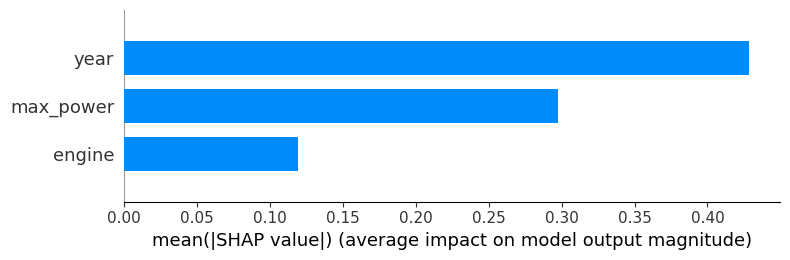

In [37]:
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names = X.columns)

according to shap, our most important feature for determining the selling_price is year which is surprising as it had the lowest correlation score of 0.42 while max_power had correlation of 0.75 and engine had 0.46 respectively

# 9. Inference

In [38]:
#saving model to folder before using it for inference for later use
import pickle

filename = './models/cars_a1.model'
pickle.dump(grid, open(filename, 'wb'))

In [39]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [40]:
#let's try to create one silly example
df[['max_power', 'engine', 'year', 'selling_price']].loc[1]

max_power           103.52
engine             1498.00
year               2014.00
selling_price    370000.00
Name: 1, dtype: float64

In [41]:
sample = np.array([[103.52, 1498.00, 2014.00]])

In [42]:
pred_y = loaded_model.predict(sample)
pred_y = np.exp(pred_y)  #reverting the logarithmic scaling
print("The predicted selling price of the inputed sample car is: ", pred_y)
print("The actual selling price of the car in question is: ", df['selling_price'].loc[1])
#here we can see the predicted car price is 399,338.31 units which is pretty close to the actual selling price of 370,000.00 units

The predicted selling price of the inputed sample car is:  [395296.5058154]
The actual selling price of the car in question is:  370000


# Task 2. Report

1. Which features are important? Which are not? Why?

    In the grand scheme of things, the important features are maximum engine power, engine size and year. According to basic correlation, maximum engine power and engine size look to be the most important because that is usually want influences the price of the car at the time of its sale shortly after manufacturing. Engine size (CC) dictates maximum possible engine power and larger engine size often results in higher manufacturing costs, bumping its final selling price. If the car was imported by the seller then that hikes up the cost even further as customs will charge tax based on the engine size CC, focing the seller to increase costs to maintain their profit margin.

    Even though larger engine size correlates to more engine power, engines of the same sizes can differing engine power depending on the engineering and techniques involved in the vehicle to deliver the power from the engine combustion chamber to the transmission driveshaft such as better air injection and fuel injection, using superchargers to create a richer fuel-air mixture in the same volume and more complex transaxle design, thus we can see why max engine power outweighs the engine size in CC.

    However, despite those being the case, ultimately the most important feature ends up being the year, this is most likely because the previous two features accurately predict the cost of the vehicle at the year of its manufacturing, however the depreciation of the value of the car from the years aging the car far outweighs the values in prediction purely from engine power and size alone. On top of that, it might also be due to the dataset having a significantly more amount of older vehicles with depreciated cheaper price (unbalanced dataset), causing our model to become biased towards the feature "year".

2. Which algorithm performs well? Which does not? Why?

    Amongst all the algorithms that we've used so far, Random Forest performs the best because compared to other algorithms because it is less sensitive to hyperparameters and the least susceptible to noisy data which is definitely the case for our dataset as it can be seen that out of 4 numeric labels where we had to do imputation, 3 of them weren't normally distributed.

    Also the benefits of random forest exists due to its fundamental concept of combining many weak trees via ensemble modelling which reduces variance without increasing bias by a significant enough factor. Meanwhile other algorithms such as linear regression assumes a linear relationship between label and target which is definitely not the case, support vector regression is better than linear regression in the regard that it can model non-linear relationships, however it stuggles with large datasets such as those that we used in this assignment, meanwhile although K-Nearest Neighbours can handle larger datasets, they are very sensitive to noisy data present in our dataset. 
    
    Lastly, although decision tree regressor is capable of handling both non-linearity, handle large datasets and less suspectible to noise in data, it tends to use and generalize single splits which may fall into a pitfall of local gradient descent ridges and becomes overfitted.